# Exemple d'analyse d'un dataset : prix des maisons à Boston


** Exemple de régressions **

## Importations des librairies courantes

In [1]:
# Directive pour afficher les graphiques dans Jupyter (inutile si on utilise Spyder)
%matplotlib inline

In [2]:
# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Lecture du fichier

In [3]:
#lecture des ensembles d'apprentissage et de test
data_train=pd.read_csv("boston_train.csv")
data_test=pd.read_csv("boston_test.csv")


On veut estimer la valeur, qu'on positionne dans un vecteur *Y*, et les paramètres dans une table *X* :

In [4]:
Y_train = data_train.MV
X_train = data_train.drop(['MV'], axis=1)
Y_test = data_test.MV
X_test = data_test.drop(['MV'], axis=1)

On vérifie les dimensions :

In [5]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(392, 12)
(98, 12)
(392,)
(98,)


## Régression linéaire multiple

On utilise la fonction de régression linéaire multiple de *sklearn* :

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lm = LinearRegression()
lm.fit(X_train, Y_train)            # apprentissage
Y_pred = lm.predict(X_test)         # prédiction sur l'ensemble de test

On trace le nuage de points pour comparer la prédiction et les résultats attendus :

Text(0.5,1,'Prix reels vs predictions')

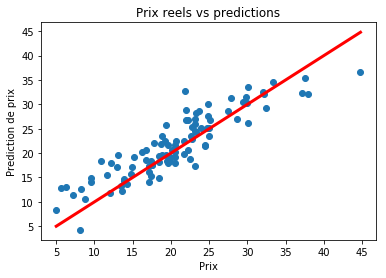

In [8]:
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], color='red', linewidth=3)
plt.xlabel("Prix")
plt.ylabel("Prediction de prix")
plt.title("Prix reels vs predictions")

ou on peut visualiser la distribution de l'erreur avec *seaborn* :

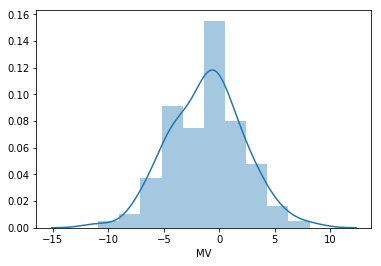

In [9]:
sns.distplot(Y_test-Y_pred)

On peut calculer l'erreur sur les moindres carrés :

In [10]:
from sklearn import metrics
print(metrics.mean_squared_error(Y_test, Y_pred))

12.1164657055


Ou le *score R2* (rapport des variances estimée/réelle) :
(https://fr.wikipedia.org/wiki/Coefficient_de_d%C3%A9termination)

In [11]:
scoreR2 = metrics.r2_score(Y_test, Y_pred)
print(scoreR2)

0.776621899686


## Régression par forêts aléatoires

In [12]:
from sklearn import ensemble
rf = ensemble.RandomForestRegressor()
rf.fit(X_train, Y_train)
Y_rf = rf.predict(X_test)

Text(0.5,1,'Prix reels vs predictions')

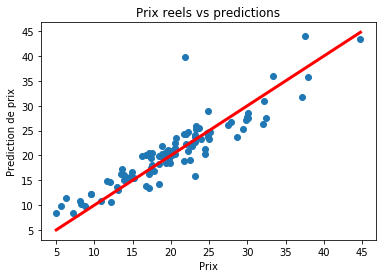

In [13]:
plt.scatter(Y_test, Y_rf)
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], color='red', linewidth=3)
plt.xlabel("Prix")
plt.ylabel("Prediction de prix")
plt.title("Prix reels vs predictions")

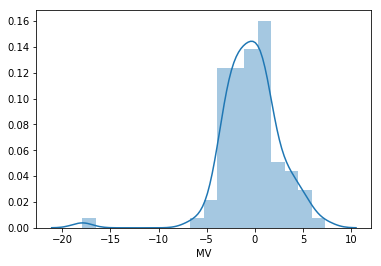

In [14]:
sns.distplot(Y_test-Y_rf)

In [15]:
print(metrics.mean_squared_error(Y_test, Y_rf))

9.72101490973


In [16]:
from sklearn import model_selection
param_grid = {
              'n_estimators': [50, 100, 500],
              'min_samples_leaf': [1, 3, 5]
             }
estimator = ensemble.RandomForestRegressor()
rf_gs = model_selection.GridSearchCV(estimator, param_grid)

In [17]:
rf_gs.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 500], 'min_samples_leaf': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
print(rf_gs.best_params_)

{'min_samples_leaf': 1, 'n_estimators': 500}


In [19]:
rf2 = rf_gs.best_estimator_
Y_rf2 = rf.predict(X_test)

In [20]:
print(metrics.mean_squared_error(Y_test, Y_rf2))

9.72101490973
